In [197]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm

In [198]:
df = pd.read_csv("Szereg_niesezonowy.csv", sep=";")
df

,DATA,Value
0,01.01.2006,"1734,41"
1,01.02.2006,"1761,99"
2,01.03.2006,"1798,05"
3,01.04.2006,"1951,21"
4,01.05.2006,"2060,04"
...,...,...
175,01.08.2020,"7323,32"
176,01.09.2020,"7295,92"
177,01.10.2020,"7342,55"
178,01.11.2020,"7103,59"


In [199]:
#change commas to dots
df = df.apply(lambda x: x.str.replace(',','.'))
df

,DATA,Value
0,01.01.2006,1734.41
1,01.02.2006,1761.99
2,01.03.2006,1798.05
3,01.04.2006,1951.21
4,01.05.2006,2060.04
...,...,...
175,01.08.2020,7323.32
176,01.09.2020,7295.92
177,01.10.2020,7342.55
178,01.11.2020,7103.59


In [200]:
df.columns

Index(['DATA', 'Value'], dtype='object')

In [201]:
df.dtypes

DATA     object
Value    object
dtype: object

In [202]:
df.DATA = pd.to_datetime(df.DATA)

In [203]:
df.Value = pd.to_numeric(df.Value, downcast="float")

In [204]:
df.dtypes

DATA     datetime64[ns]
Value           float32
dtype: object

In [205]:
df.columns = ["timestamp", "value"]
df.columns

Index(['timestamp', 'value'], dtype='object')

In [206]:
df

,timestamp,value
0,2006-01-01,1734.410034
1,2006-01-02,1761.989990
2,2006-01-03,1798.050049
3,2006-01-04,1951.209961
4,2006-01-05,2060.040039
...,...,...
175,2020-01-08,7323.319824
176,2020-01-09,7295.919922
177,2020-01-10,7342.549805
178,2020-01-11,7103.589844


In [210]:
df

,timestamp,value
0,2006-01-01,1734.410034
1,2006-01-02,1761.989990
2,2006-01-03,1798.050049
3,2006-01-04,1951.209961
4,2006-01-05,2060.040039
...,...,...
175,2020-01-08,7323.319824
176,2020-01-09,7295.919922
177,2020-01-10,7342.549805
178,2020-01-11,7103.589844


### TODO: set y ticks as dates

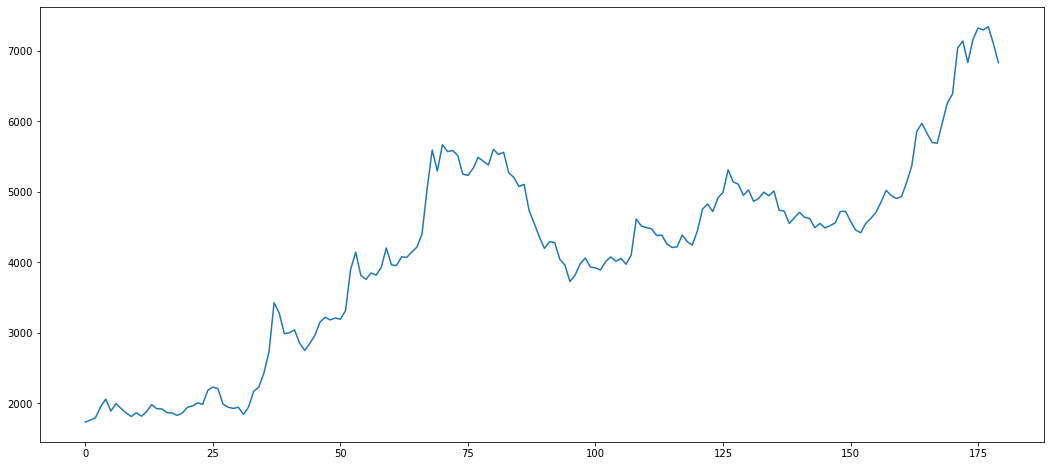

In [208]:
df['value'].plot()

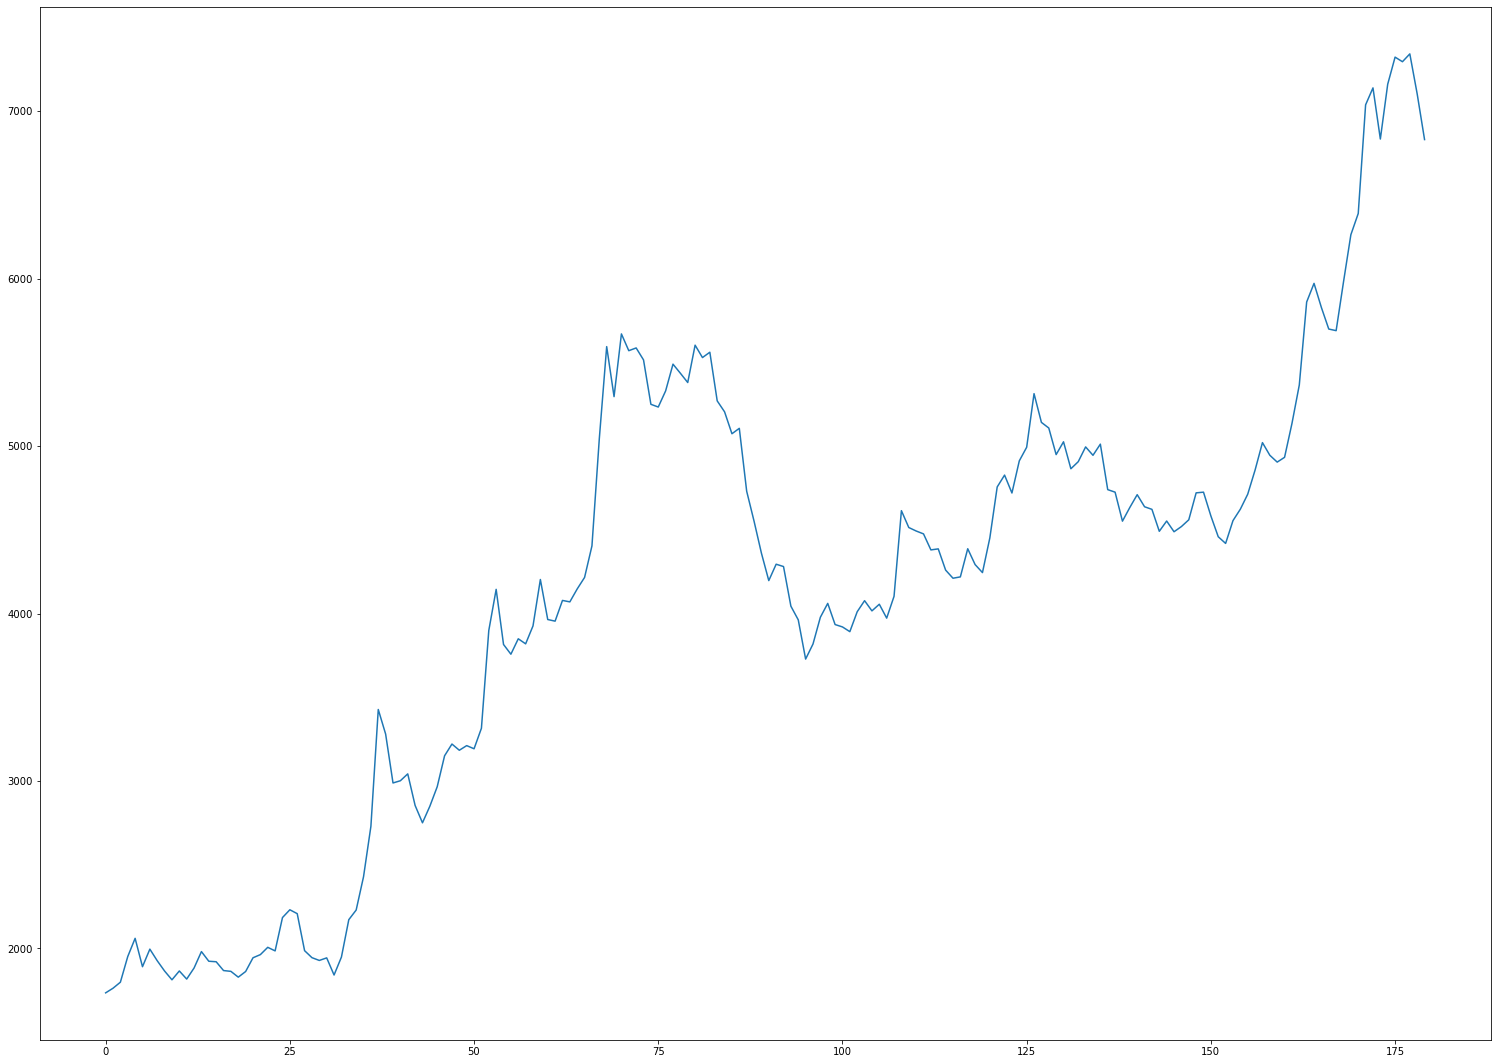

In [211]:
plt.figure(figsize=(26, 19))
plt.plot(df.index, df.value) 
plt.show()

## SERIES DECOMPOSITION

In [214]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df.timestamp, model='additive')
fig = decomposition.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

### Logarytm zmiennej

In [215]:
df['log_value'] = np.log(df['value'])

In [216]:
df

,timestamp,value,log_value
0,2006-01-01,1734.410034,7.458423
1,2006-01-02,1761.989990,7.474199
2,2006-01-03,1798.050049,7.494458
3,2006-01-04,1951.209961,7.576205
4,2006-01-05,2060.040039,7.630481
...,...,...,...
175,2020-01-08,7323.319824,8.898819
176,2020-01-09,7295.919922,8.895071
177,2020-01-10,7342.549805,8.901442
178,2020-01-11,7103.589844,8.868356


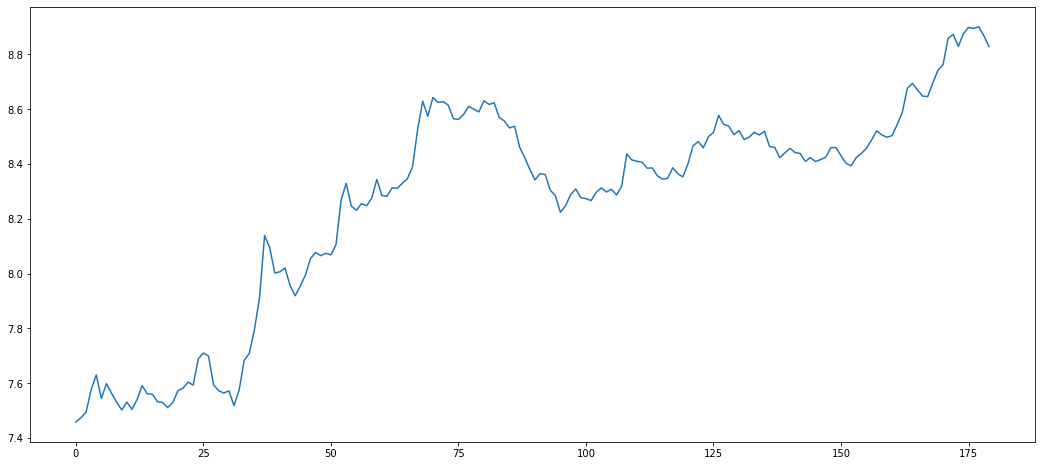

In [217]:
#Zmieniły się wartości na osi OY, a więc i wahania (zmieniła się skala)
df.log_value.plot()

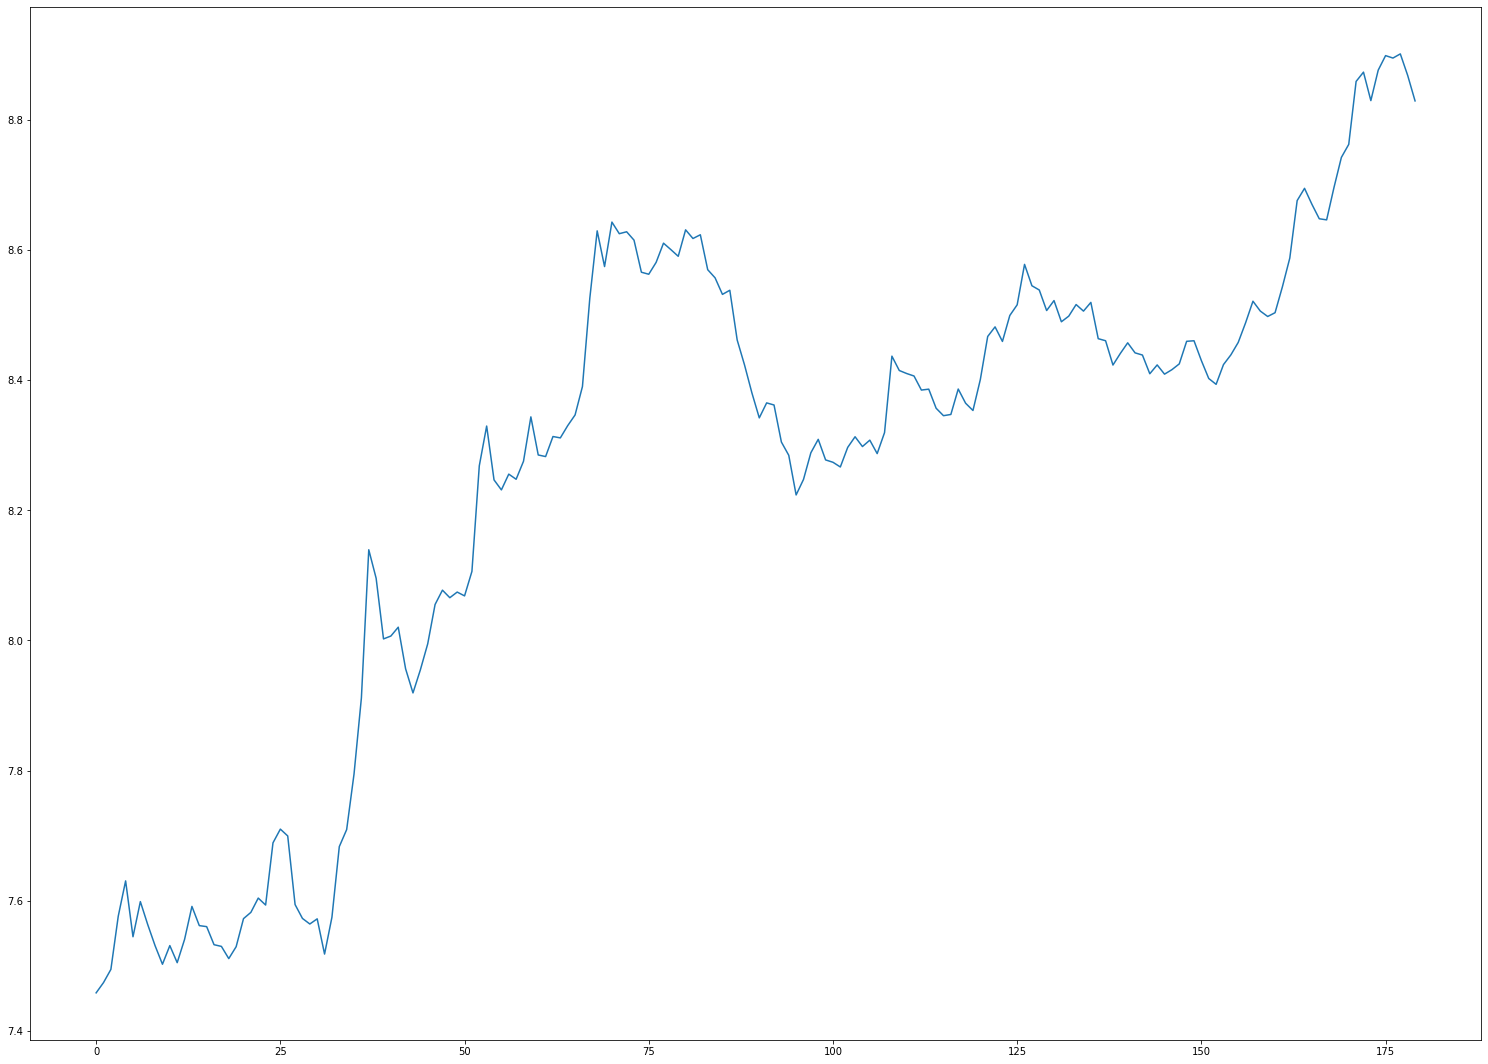

In [218]:
plt.figure(figsize=(26, 19))
plt.plot(df.index, df.log_value) 
plt.show()

In-sample period

In [219]:
df

,timestamp,value,log_value
0,2006-01-01,1734.410034,7.458423
1,2006-01-02,1761.989990,7.474199
2,2006-01-03,1798.050049,7.494458
3,2006-01-04,1951.209961,7.576205
4,2006-01-05,2060.040039,7.630481
...,...,...,...
175,2020-01-08,7323.319824,8.898819
176,2020-01-09,7295.919922,8.895071
177,2020-01-10,7342.549805,8.901442
178,2020-01-11,7103.589844,8.868356


In [220]:
df_in = df[df.timestamp < "2020-01-10"] #df.index
df_in

,timestamp,value,log_value
0,2006-01-01,1734.410034,7.458423
1,2006-01-02,1761.989990,7.474199
2,2006-01-03,1798.050049,7.494458
3,2006-01-04,1951.209961,7.576205
4,2006-01-05,2060.040039,7.630481
...,...,...,...
172,2020-01-05,7139.620117,8.873415
173,2020-01-06,6834.109863,8.829681
174,2020-01-07,7161.589844,8.876488
175,2020-01-08,7323.319824,8.898819


First difference

In [321]:
#NIEPOPRAWNE (bo diff jest w tym przypadku dla value, a powinien być dla logarithm value)
#diff_s = df_in.value.diff()
#plt.plot(diff_s)
#plt.show()

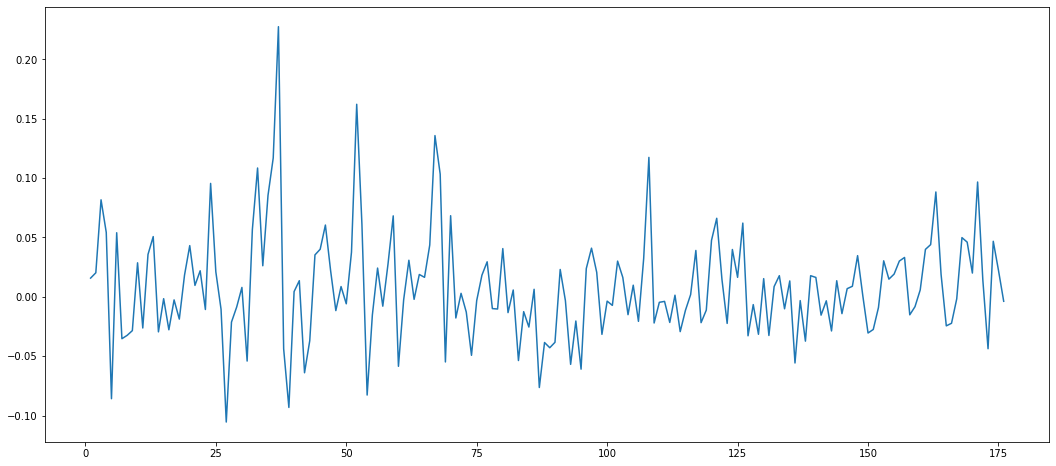

In [221]:
#POPRAWNE (bo tu diff jest dla logarithm value)
diff_s = df_in['log_value'].diff()
plt.plot(diff_s)
plt.show()

In [223]:
diff_df = df_in
diff_df

,timestamp,value,log_value
0,2006-01-01,1734.410034,7.458423
1,2006-01-02,1761.989990,7.474199
2,2006-01-03,1798.050049,7.494458
3,2006-01-04,1951.209961,7.576205
4,2006-01-05,2060.040039,7.630481
...,...,...,...
172,2020-01-05,7139.620117,8.873415
173,2020-01-06,6834.109863,8.829681
174,2020-01-07,7161.589844,8.876488
175,2020-01-08,7323.319824,8.898819


In [224]:
diff_df['diff_value'] = diff_s
diff_df

C:\Users\Darek_PC\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,timestamp,value,log_value,diff_value
0,2006-01-01,1734.410034,7.458423,NaN
1,2006-01-02,1761.989990,7.474199,27.579956
2,2006-01-03,1798.050049,7.494458,36.060059
3,2006-01-04,1951.209961,7.576205,153.159912
4,2006-01-05,2060.040039,7.630481,108.830078
...,...,...,...,...
172,2020-01-05,7139.620117,8.873415,101.180176
173,2020-01-06,6834.109863,8.829681,-305.510254
174,2020-01-07,7161.589844,8.876488,327.479980
175,2020-01-08,7323.319824,8.898819,161.729980


## ANALIZA STACJONARNOŚCI - graficznie

#### ACF and PACF

In [225]:
diff_df['diff_value'].values

array([         nan,   27.579956 ,   36.06006  ,  153.15991  ,
        108.83008  , -169.46008  ,  104.910034 ,  -69.20996  ,
        -61.55005  ,  -52.359985 ,   52.70996  ,  -48.329956 ,
         66.05005  ,   98.0199   ,  -57.609985 ,   -3.0100098,
        -52.589966 ,   -4.829956 ,  -34.630005 ,   33.70996  ,
         82.089966 ,   18.820068 ,   43.579956 ,  -21.289917 ,
        199.06006  ,   46.539795 ,  -23.25     , -221.0199   ,
        -41.829956 ,  -16.560059 ,   15.329956 , -102.380005 ,
        107.160034 ,  223.35999  ,   57.58008  ,  198.8999   ,
        301.28003  ,  697.6301   , -146.93018  , -291.8899   ,
         13.23999  ,   41.090088 , -188.58008  , -103.70996  ,
         98.90991  ,  116.55005  ,  184.90991  ,   70.1001   ,
        -37.150146 ,   27.680176 ,  -18.800049 ,  122.44995  ,
        583.89014  ,  245.81006  , -329.1902   ,  -58.16992  ,
         92.12988  ,  -30.20996  ,  107.09009  ,  277.16016  ,
       -239.00024  ,   -9.75     ,  123.75     ,   -8.5

In [226]:
del diff_df["value"]
del diff_df["log_value"]
diff_df

,timestamp,diff_value
0,2006-01-01,NaN
1,2006-01-02,27.579956
2,2006-01-03,36.060059
3,2006-01-04,153.159912
4,2006-01-05,108.830078
...,...,...
172,2020-01-05,101.180176
173,2020-01-06,-305.510254
174,2020-01-07,327.479980
175,2020-01-08,161.729980


### I have to delete first value (0), otherwise ACF will NOT work

In [227]:
diff_df = diff_df[diff_df.timestamp > '2006-01-01']
diff_df

,timestamp,diff_value
1,2006-01-02,27.579956
2,2006-01-03,36.060059
3,2006-01-04,153.159912
4,2006-01-05,108.830078
5,2006-01-06,-169.460083
...,...,...
172,2020-01-05,101.180176
173,2020-01-06,-305.510254
174,2020-01-07,327.479980
175,2020-01-08,161.729980


In [229]:
diff_df.diff_value.squeeze()

1       27.579956
2       36.060059
3      153.159912
4      108.830078
5     -169.460083
          ...    
172    101.180176
173   -305.510254
174    327.479980
175    161.729980
176    -27.399902
Name: diff_value, Length: 176, dtype: float32

## ACF and PACF

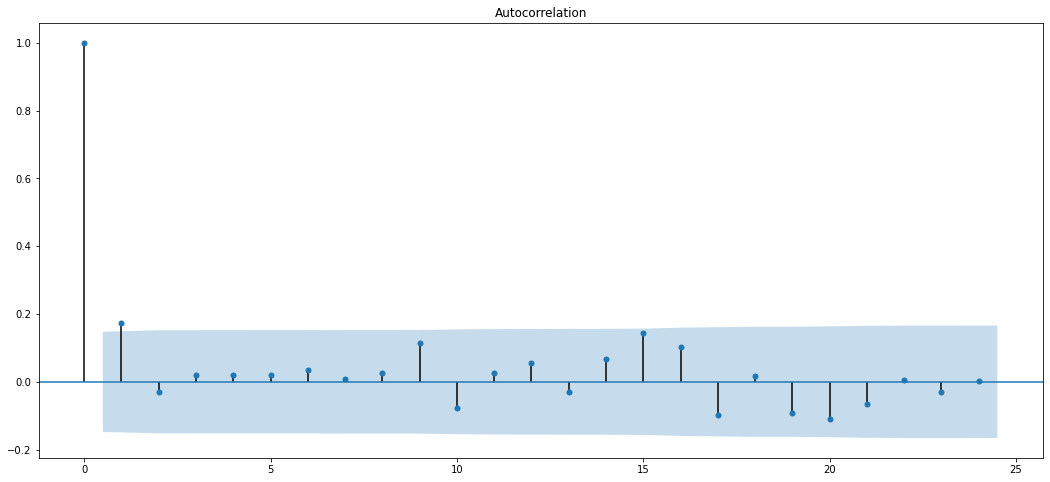

In [233]:
#POPRAWNY WYKRES
sm.graphics.tsa.plot_acf(diff_df.diff_value.squeeze(), lags=24) #diff_df.values.squeeze()
plt.show()
#Pierwszą wypustkę pomijamy, bo to korelacja zmiennej sama ze sobą

#### PACF

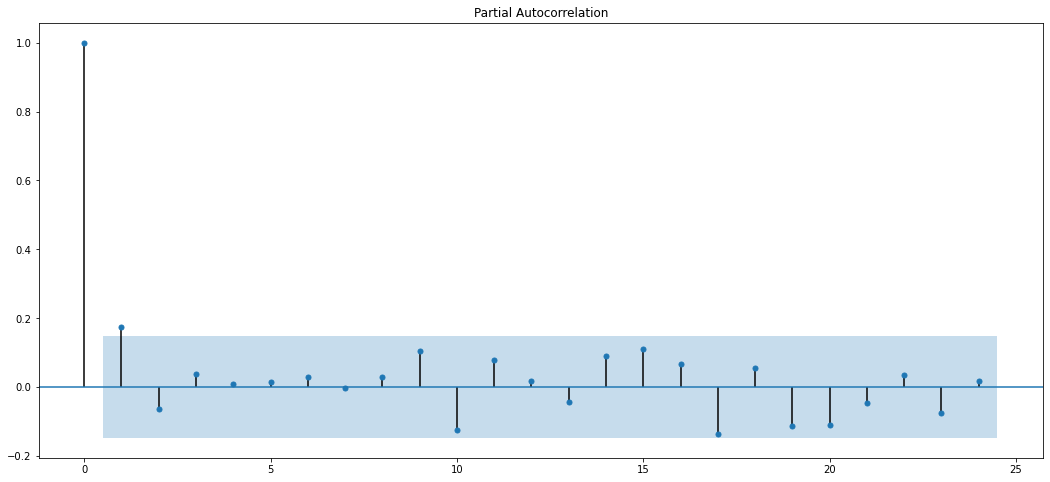

In [234]:
#https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html?highlight=plot_pacf#statsmodels.graphics.tsaplots.plot_pacf
sm.graphics.tsa.plot_pacf(diff_df.diff_value.squeeze(), lags=24, method="ywm")
plt.show()

# Na podstawie analizy graficznej stwierdzamy, że nasz model to ARIMA(1,1,1)
- ARIMA(p,d,q):
- p od wykresu PACF
- d to ilość różnicowań (first difference)
- q od wykresu ACF

### Other plots

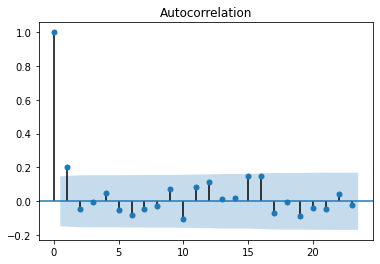

In [138]:
sm.graphics.tsa.plot_acf(diff_df['diff_value'])
plt.show()

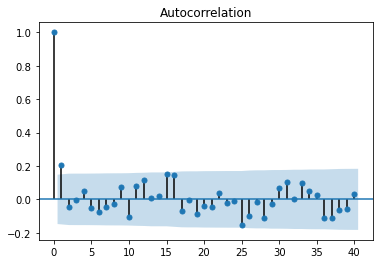

In [139]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(diff_df['diff_value'], lags=40);

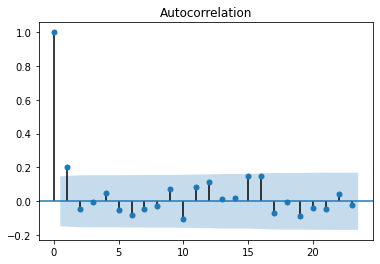

In [140]:
sm.graphics.tsa.plot_acf(diff_df['diff_value'].values)
plt.show()

### EXEMPLARY ACF

In [24]:
dta = sm.datasets.sunspots.load_pandas().data
dta

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [25]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
dta

,YEAR,SUNACTIVITY
1700-12-31,1700.0,5.0
1701-12-31,1701.0,11.0
1702-12-31,1702.0,16.0
1703-12-31,1703.0,23.0
1704-12-31,1704.0,36.0
...,...,...
2004-12-31,2004.0,40.4
2005-12-31,2005.0,29.8
2006-12-31,2006.0,15.2
2007-12-31,2007.0,7.5


In [26]:
del dta["YEAR"]
dta

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0
...,...
2004-12-31,40.4
2005-12-31,29.8
2006-12-31,15.2
2007-12-31,7.5


In [78]:
dta.values.squeeze()

array([  5. ,  11. ,  16. ,  23. ,  36. ,  58. ,  29. ,  20. ,  10. ,
         8. ,   3. ,   0. ,   0. ,   2. ,  11. ,  27. ,  47. ,  63. ,
        60. ,  39. ,  28. ,  26. ,  22. ,  11. ,  21. ,  40. ,  78. ,
       122. , 103. ,  73. ,  47. ,  35. ,  11. ,   5. ,  16. ,  34. ,
        70. ,  81. , 111. , 101. ,  73. ,  40. ,  20. ,  16. ,   5. ,
        11. ,  22. ,  40. ,  60. ,  80.9,  83.4,  47.7,  47.8,  30.7,
        12.2,   9.6,  10.2,  32.4,  47.6,  54. ,  62.9,  85.9,  61.2,
        45.1,  36.4,  20.9,  11.4,  37.8,  69.8, 106.1, 100.8,  81.6,
        66.5,  34.8,  30.6,   7. ,  19.8,  92.5, 154.4, 125.9,  84.8,
        68.1,  38.5,  22.8,  10.2,  24.1,  82.9, 132. , 130.9, 118.1,
        89.9,  66.6,  60. ,  46.9,  41. ,  21.3,  16. ,   6.4,   4.1,
         6.8,  14.5,  34. ,  45. ,  43.1,  47.5,  42.2,  28.1,  10.1,
         8.1,   2.5,   0. ,   1.4,   5. ,  12.2,  13.9,  35.4,  45.8,
        41.1,  30.1,  23.9,  15.6,   6.6,   4. ,   1.8,   8.5,  16.6,
        36.3,  49.6,

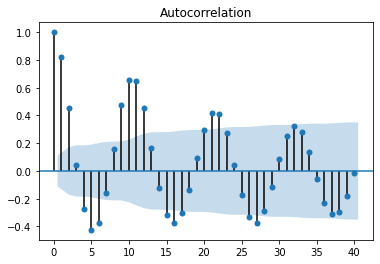

In [28]:
sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40)
plt.show()

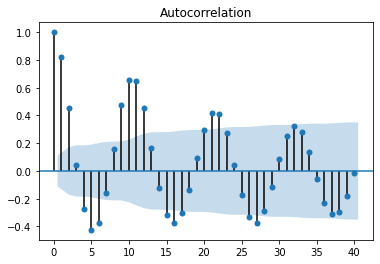

In [23]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40)
plt.show()

### -- end of example -- ##

## ANALIZA STACJONARNOŚCI - testy formalne

In [236]:
#Set timestamp as index
diff_df.set_index('timestamp', inplace=True)

### Dickey-Fuller test

In [237]:
diff_df

,diff_value
timestamp,
2006-01-02,27.579956
2006-01-03,36.060059
2006-01-04,153.159912
2006-01-05,108.830078
2006-01-06,-169.460083
...,...
2020-01-05,101.180176
2020-01-06,-305.510254
2020-01-07,327.479980


In [238]:
result

(-10.69422758194374,
 3.6596255403129165e-19,
 0,
 175,
 {'1%': -3.4682803641749267,
  '5%': -2.8782017240816327,
  '10%': -2.5756525795918366},
 -543.453077633676)

## Na podstawie analizy graficznej, przechodzę do rozszerzonego testu. PYthon nie posiada podstawowego testu Dickey-Fullera. 

In [241]:
diff_df.diff_value

timestamp
2006-01-02     27.579956
2006-01-03     36.060059
2006-01-04    153.159912
2006-01-05    108.830078
2006-01-06   -169.460083
                 ...    
2020-01-05    101.180176
2020-01-06   -305.510254
2020-01-07    327.479980
2020-01-08    161.729980
2020-01-09    -27.399902
Name: diff_value, Length: 176, dtype: float32

In [242]:
from statsmodels.tsa.stattools import adfuller

series = diff_df.diff_value.squeeze()
X = series
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.022106
p-value: 0.000000
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


### H0: Szereg jest niestacjonarny. 
#### Ponieważ ADF Statistic (-11.02) jest mniejsze od wartości krytycznej(-3.468), to odrzucam hipotezę zerową. 
#### Można też powiedzieć, że p-value (0%) jest mniejsze od założonego poziomu istotności (1%), dlatego odrzucamy hipotezę zerową. 

In [145]:
?adfuller

In [144]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, regression = "c", autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [146]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [243]:
adf_test(diff_df.diff_value.squeeze()) #diff_df.diff_value.squeeze() #diff_df.values.squeeze()

Results of Dickey-Fuller Test:
Test Statistic                -1.102211e+01
p-value                        5.951952e-20
#Lags Used                     0.000000e+00
Number of Observations Used    1.750000e+02
Critical Value (1%)           -3.468280e+00
Critical Value (5%)           -2.878202e+00
Critical Value (10%)          -2.575653e+00
dtype: float64


In [244]:
kpss_test(diff_df.diff_value.squeeze())

Results of KPSS Test:
Test Statistic           0.140445
p-value                  0.100000
Lags Used                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\Darek_PC\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### H0: Analizowana zmienna jest stacjonarna. 
#### p-value(10%) jest większa niż poziom istotności 1%, a zatem brak podstaw do odrzucenia hipotezy zerowej. 
#### Wartość Test Statistic 0.14 jest mniejsza od poziomu istotności 1% (0.739), a zatem hipotezy zerowej nie można odrzucić. 

## Test Ljunga-Boxa oraz Boxa-Pierce'a, czyli sprawdzenie autokorelacji reszt
https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html

test Ljunga-Boxa

In [251]:
data = diff_df
res = sm.tsa.ARIMA(data["diff_value"], (1,1,1)).fit(disp=-1)
sm.stats.acorr_ljungbox(res.resid, lags=[24], return_df=True)

C:\Users\Darek_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Darek_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,lb_stat,lb_pvalue
24,20.961192,0.641014


Test Boxa-Pierce'a: set parameter boxpierce = True

In [252]:
data = diff_df
res = sm.tsa.ARIMA(data["diff_value"], (1,1,1)).fit(disp=-1)
sm.stats.acorr_ljungbox(res.resid, lags=[24], return_df=True, boxpierce = True)

C:\Users\Darek_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Darek_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
24,20.961192,0.641014,19.061613,0.748696


H0: Reszty z modelu są białym szumem. 
Wartości p-value z obu testów (0.64 oraz 0.74) są większe od poziomu istotności p-value 1%, a zatem brak podstaw do odrzucenia hipotezy zerowej. Reszty są białym szumem - jest to stan pożądany. 

## ARIMA

In [167]:
data.diff_value

timestamp
2006-01-02    0.015777
2006-01-03    0.020259
2006-01-04    0.081747
2006-01-05    0.054276
2006-01-06   -0.085842
                ...   
2020-01-05    0.014274
2020-01-06   -0.043734
2020-01-07    0.046806
2020-01-08    0.022331
2020-01-09   -0.003748
Name: diff_value, Length: 176, dtype: float32

In [268]:
arima111.summary()

AttributeError: 'ARIMA' object has no attribute 'summary'

In [271]:
#ANALIZA OD OGÓŁU DO SZCZEGÓŁU
from statsmodels.tsa.arima_model import ARIMA
#https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

model = ARIMA(data.diff_value, order=(1,1,1))
model_fit = model.fit()
#alterntywnie w jednej linii: arima111 = ARIMA(data.diff_value, order=(1,1,1)).fit()
print(model_fit.summary())
#save model as arima111
arima111 = model

C:\Users\Darek_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Darek_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.diff_value   No. Observations:                  175
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1156.661
Method:                       css-mle   S.D. of innovations            177.116
Date:                Tue, 28 Sep 2021   AIC                           2321.323
Time:                        20:07:52   BIC                           2333.982
Sample:                             1   HQIC                          2326.458
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1647      0.319      0.517      0.605      -0.460       0.789
ar.L1.D.diff_value     0.1783      0.075      2.391      0.017       0.032       0.324
ma.L1.D.diff_value  

In [263]:
#Jeśli założylibyśmy poziom istotności 1%, to trzeba zmniejszyć p (ar) o jeden stopień
model = ARIMA(data.diff_value, order=(0,1,1))
model_fit = model.fit()
print(model_fit.summary())
arima011 = model

                             ARIMA Model Results                              
Dep. Variable:           D.diff_value   No. Observations:                  175
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1159.482
Method:                       css-mle   S.D. of innovations            179.810
Date:                Tue, 28 Sep 2021   AIC                           2324.964
Time:                        19:59:06   BIC                           2334.458
Sample:                             1   HQIC                          2328.815
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1683      0.267      0.631      0.528      -0.355       0.691
ma.L1.D.diff_value    -1.0000      0.075    -13.268      0.000      -1.148      -0.852
                    

C:\Users\Darek_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Darek_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


# TODO: likelihood ratio

In [266]:
#Teraz sprawdzam, czy miałem prawo zmniejszyć o 1 ar wykonując test wiarygodności - Log Likelihood/likelihood ratio
def likelihood_ratio(llmin, llmax):
    return(2*(llmax-llmin))

L1 = arima111
print(L1)
L2 = arima011
#LR = -2. * np.log(L2 / L1)
#LR = likelihood_ratio(L1,L2)

In [ ]:
#teststat<- 2*(as.numeric(logLik(arima211))-as.numeric(logLik(arima111)))
#teststat

In [256]:
#ANALIZA OD OGÓŁU DO SZCZEGÓŁU
from scipy.stats.distributions import chi2

def likelihood_ratio(llmin, llmax):
    return(2*(llmax-llmin))

L1 = 467400. # log(likelihood) of my 1st fit
L2 = 467414. # log(likelihood) of my 2nd fit

LR = likelihood_ratio(L1,L2)
#LR = -2. * np.log(L2 / L1) # LR = -5.9905e-05

p = chi2.sf(LR, 1) # L2 has 1 DoF more than L1

print('p: %.30f' % p )

# p: 0.000000121315450836607258011741

p: 0.000000121315450836607258011741


In [273]:
#POSSIBLE ARIMA COMBINATIONS - ANALIZA AUTOMATYCZNA
for p in range(0,2):
    for d in range(1,2):
        for q in range(0,2):
            results = ARIMA(data.diff_value, order=(p, d, q)).fit()
            print('ARIMA({}, {}, {}) - AIC:{} - BIC:{} - HQIC:{}'.format(p, d, q, results.aic, results.bic, results.hqic))

C:\Users\Darek_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Darek_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Darek_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Darek_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency informati

ARIMA(0, 1, 0) - AIC:2405.8643799459996 - BIC:2412.1939518938466 - HQIC:2408.4318346017762
ARIMA(0, 1, 1) - AIC:2324.963633601228 - BIC:2334.457991522999 - HQIC:2328.8148155848926
ARIMA(1, 1, 0) - AIC:2381.434145572606 - BIC:2390.928503494377 - HQIC:2385.2853275562707


C:\Users\Darek_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Darek_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1) - AIC:2321.32275928327 - BIC:2333.981903178964 - HQIC:2326.4576685948227


## Analiza automatyczna wskazuje na to samo, co analiza od ogółu do szczegółu - najlepsze (czyli najniższe) wartości AIC, BIC i HQIC ma ARIMA(1,1,1)
### Gdyby te wskaźniki się między sobą różniły, wykonujemy predykcję dla obu (nie odrzucamy jakiegoś z modeli.) i na podstawie miar błędów predykcji (MAPE, AMAPE, MSE) wybieramy najlepszy model. 

## Fitting ARIMA model

In [275]:
data.diff_value

timestamp
2006-01-02     27.579956
2006-01-03     36.060059
2006-01-04    153.159912
2006-01-05    108.830078
2006-01-06   -169.460083
                 ...    
2020-01-05    101.180176
2020-01-06   -305.510254
2020-01-07    327.479980
2020-01-08    161.729980
2020-01-09    -27.399902
Name: diff_value, Length: 176, dtype: float32

In [283]:
df

,timestamp,value,log_value
0,2006-01-01,1734.410034,7.458423
1,2006-01-02,1761.989990,7.474199
2,2006-01-03,1798.050049,7.494458
3,2006-01-04,1951.209961,7.576205
4,2006-01-05,2060.040039,7.630481
...,...,...,...
175,2020-01-08,7323.319824,8.898819
176,2020-01-09,7295.919922,8.895071
177,2020-01-10,7342.549805,8.901442
178,2020-01-11,7103.589844,8.868356


In [293]:
df['log_value'][:177]

0      7.458423
1      7.474199
2      7.494458
3      7.576205
4      7.630481
         ...   
172    8.873415
173    8.829681
174    8.876488
175    8.898819
176    8.895071
Name: log_value, Length: 177, dtype: float32

In [287]:
df['log_value'][177:]

177    8.901442
178    8.868356
179    8.829213
Name: log_value, dtype: float32

In [299]:
# Create Training and Test
#JAko zbiór treningowy i testowy używamy danych zlogarytmowanych, ale nie po pierwszej różnicy, gdyż first difference 
#była potrzebna tylko do analizy - do ustalenia modelu
train = df['log_value'][:177]
test = df['log_value'][177:]

In [317]:
train, test

(0      7.458423
 1      7.474199
 2      7.494458
 3      7.576205
 4      7.630481
          ...   
 172    8.873415
 173    8.829681
 174    8.876488
 175    8.898819
 176    8.895071
 Name: log_value, Length: 177, dtype: float32,
 177    8.901442
 178    8.868356
 179    8.829213
 Name: log_value, dtype: float32)

In [300]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)

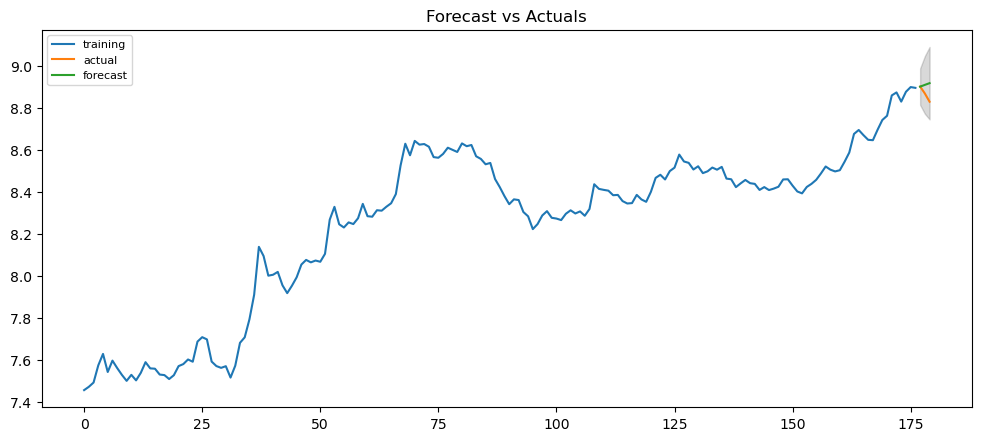

In [304]:
# Forecast
fc, se, conf = fitted.forecast(3, alpha=0.05)  # 3 okresy do przodu, 95% conf
#se - błąd standardowy
#fc - forecast
#conf - poziom ufności

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

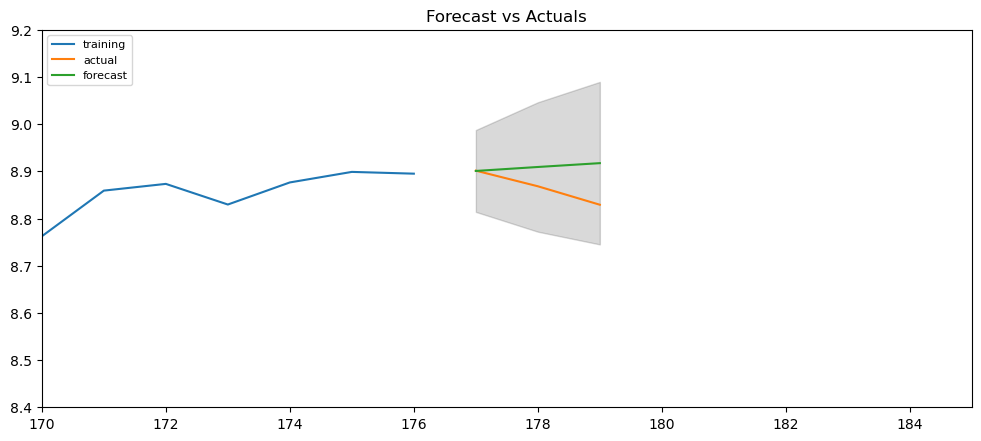

In [315]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.xlim([170, 185])
plt.ylim([8.4, 9.2])
plt.show()

# TODO: połącz punkty między 176 a 177

In [319]:
#MAPE, MAE, RMSE
from statsmodels.tsa.stattools import acf
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

C:\Users\Darek_PC\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


{'mape': 0.004887970447552175,
 'me': 0.042802732244257534,
 'mae': 0.043218762784179056,
 'mpe': 0.0048412330133446434,
 'rmse': 0.056102723507111214,
 'acf1': -0.0009384973181819464,
 'corr': -0.998303296677756,
 'minmax': 0.004848019980378315}